<a href="https://colab.research.google.com/github/17004963/SP1-LABS/blob/master/lesson1_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
%tensorflow_version 2.x

import tensorflow as tf

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow import keras

import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

# Working with a dataset

##Load and explore the dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [62]:
print('train_images shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

train_images shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

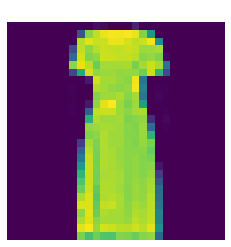

In [64]:
plt.imshow(train_images[50])
plt.title(class_names[train_labels[50]])
plt.axis('off')
plt.show()

## Transform
Convert to grayscale, normalize & standarize

In [67]:
train_images = (train_images-np.mean(train_images)) / np.std(train_images)
train_images = tf.squeeze((train_images / 255.0))

test_images = (test_images-np.mean(test_images)) / np.std(test_images)
test_images = tf.squeeze((test_images / 255.0))

train_images.shape, test_images.shape

(TensorShape([60000, 28, 28]), TensorShape([10000, 28, 28]))

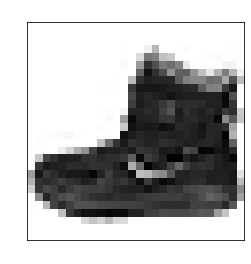

In [54]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.title(class_names[train_labels[0]])
plt.show()

## Explore final dataset

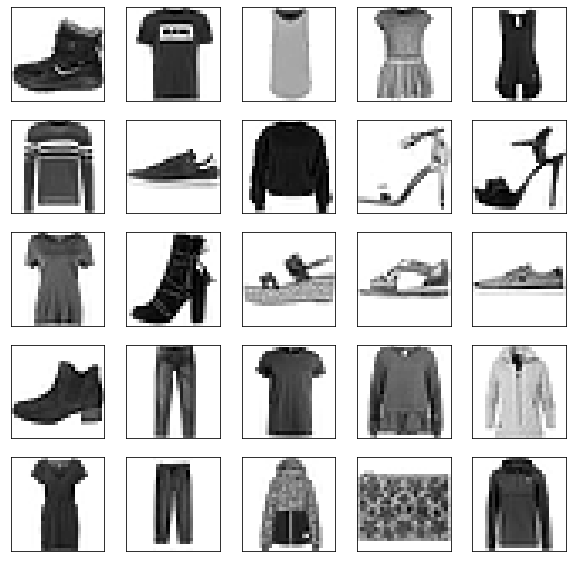

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

In [0]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


In [14]:
history=model.fit(train_images, train_labels, validation_split=0.3 ,epochs=10)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 15s 364us/sample - loss: 0.4906 - accuracy: 0.8202 - val_loss: 0.4176 - val_accuracy: 0.8506
Epoch 2/10
42000/42000 [==============================] - 15s 352us/sample - loss: 0.3748 - accuracy: 0.8631 - val_loss: 0.4055 - val_accuracy: 0.8569
Epoch 3/10
42000/42000 [==============================] - 15s 354us/sample - loss: 0.3337 - accuracy: 0.8765 - val_loss: 0.3860 - val_accuracy: 0.8649
Epoch 4/10
42000/42000 [==============================] - 15s 361us/sample - loss: 0.3092 - accuracy: 0.8849 - val_loss: 0.3336 - val_accuracy: 0.8818
Epoch 5/10
42000/42000 [==============================] - 15s 364us/sample - loss: 0.2870 - accuracy: 0.8929 - val_loss: 0.3458 - val_accuracy: 0.8817
Epoch 6/10
42000/42000 [==============================] - 15s 350us/sample - loss: 0.2705 - accuracy: 0.8988 - val_loss: 0.3317 - val_accuracy: 0.8819
Epoch 7/10
42000/42000 [====================

# Evaluate

[0.4905831920192355, 0.37478990654150646, 0.33372077164479663, 0.309189035770439, 0.2869684212491626, 0.27046534913494474, 0.255002078294754, 0.24123414746636437, 0.22711570310592652, 0.21383240137568543]
[0.4176435879866282, 0.4055242594215605, 0.3859615786340502, 0.33355304390854307, 0.34581157247887717, 0.3317303042213122, 0.33429756256275706, 0.331198468764623, 0.3370618400308821, 0.3550691378116608]


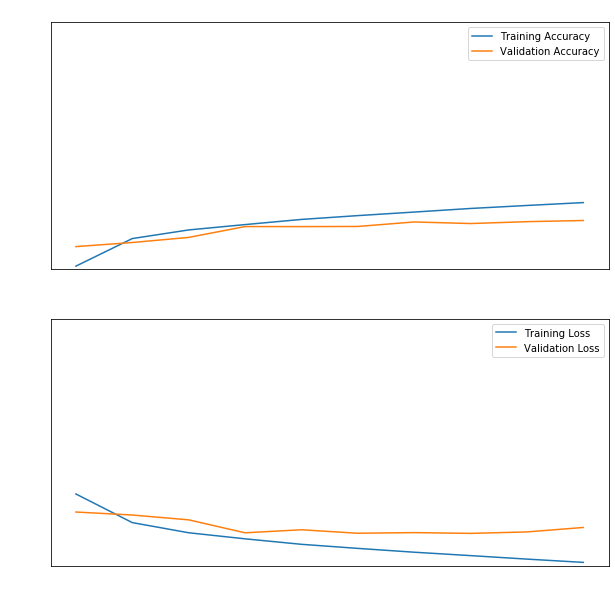

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.2])
plt.title('Training and Validation Accuracy')

print(loss)
print(val_loss)

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Cross Entropy')
plt.ylim([min(plt.ylim()),1.2])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [28]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=3)

print('Loss:', test_loss)
print('Accuracy:', test_acc)

Loss: 38.54898803482055
Accuracy: 0.8024


# Make predictions

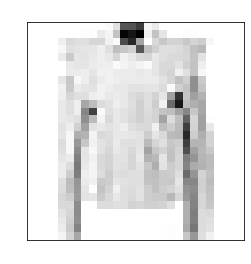


Predicted class is: Coat


In [55]:
img_index = np.random.randint(test_images.shape[0])
img = test_images[img_index]

predictions = model.predict(tf.expand_dims(img, 0))

plt.imshow(img, cmap=plt.cm.binary)
plt.title(class_names[test_labels[img_index] ])
plt.show()
print('\nPredicted class is:', class_names[np.argmax(predictions[0])])

[3.8515875e-20 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.2608992e-38
 4.4399742e-26 3.6687657e-36 0.0000000e+00 1.0000000e+00 0.0000000e+00]

Predicted class is: Bag


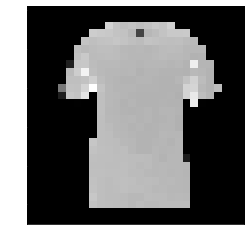

In [59]:
test_image = tf.keras.utils.get_file('Shirt.jpg','https://upload.wikimedia.org/wikipedia/commons/2/24/Blue_Tshirt.jpg')
test_image = Image.open(test_image).resize((28,28)).convert('L')
test_image = np.array(test_image)/255.0
predictions = model.predict(tf.expand_dims(test_image, 0))
print(predictions[0])
plt.imshow(test_image, cmap=plt.cm.binary)
print('\nPredicted class is:', class_names[np.argmax(predictions[0])])